<a href="https://colab.research.google.com/github/jcdumlao14/Homework-ml-zoomcamp/blob/main/04_Homework_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Zoomcamp 2022**

### Credit Card Data from book "Econometric Analysis"

## **Homework 04**



> Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings("ignore")


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

Dataset

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-01 19:39:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-01 19:39:43 (4.70 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).



In [4]:
df = pd.read_csv('AER_credit_card_data.csv')
df.columns = df.columns.str.lower()

In [5]:
df.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [6]:
#Finding duplicate values

df.duplicated().sum()

0

In [7]:
#Data Distributions

Median = []
k = ["age", "income", "share"]
for i in k:
    Median.append(df[i].median())
Median

[31.25, 2.9, 0.03882722]

 The above list shows the median values for "Age", "Income", and "Share" respectively.

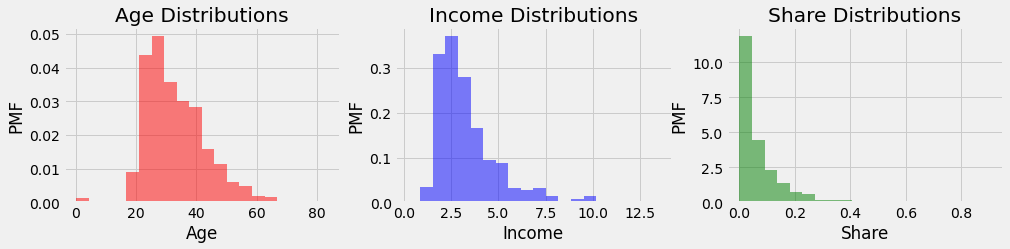

In [8]:
# Normalized histograms (Distribution)

age = df["age"]
income = df["income"]
share = df["share"]
fig = plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.xlabel("Age")
plt.ylabel("PMF")
plt.title("Age Distributions")
age.hist(histtype="bar", bins=20, alpha=0.5, color="r", density=1)
plt.subplot(1, 3, 2)
plt.xlabel("Income")
plt.ylabel("PMF")
plt.title("Income Distributions")
income.hist(histtype="bar", bins=20, alpha=0.5, color="b", density=1)
plt.subplot(1, 3, 3)
plt.xlabel("Share")
plt.ylabel("PMF")
plt.title("Share Distributions")
share.hist(histtype="bar", bins=20, alpha=0.5, color="g", density=1)


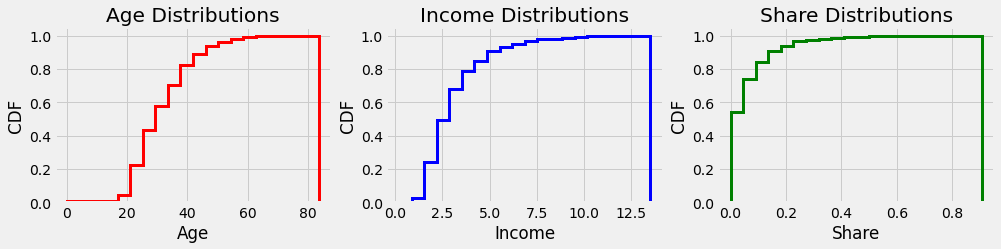

In [9]:
# Cumulative Distribution Function

fig = plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.xlabel("Age")
plt.ylabel("CDF")
plt.title("Age Distributions")
age.hist(
    histtype="step",
    cumulative=True,
    linewidth=3,
    bins=20,
    color="r",
    density=1,
)
plt.subplot(1, 3, 2)
plt.xlabel("Income")
plt.ylabel("CDF")
plt.title("Income Distributions")
income.hist(
    histtype="step",
    cumulative=True,
    linewidth=3,
    bins=20,
    color="b",
    density=1,
)
plt.subplot(1, 3, 3)
plt.xlabel("Share")
plt.ylabel("CDF")
plt.title("Share Distributions")
share.hist(
    histtype="step",
    cumulative=True,
    linewidth=3,
    bins=20,
    color="g",
    density=1,
)

# **Preparation**
___

* Create the target variable by mapping yes to 1 and no to 0.
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1.

In [10]:
import numpy as np
df['card']=np.where(df['card'] =='yes', 1, df['card'])
df['card']=np.where(df['card'] =='no', 0, df['card'])
df1 = pd.to_numeric(df['card'])
df['card'] = df1

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

In [12]:
#Label transformation
# I transformed labels of Card, owner, and selfemp to implement regression.
# Yes is equal to 1 and No is equal to 0.

k = ["card", "owner", "selfemp"]
for i in k:
    le = LabelEncoder()
    n = str(i) + "_n"
    df[n] = le.fit_transform(df[i])
for i in k:
    del df[i]
df.head()


,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_n,owner_n,selfemp_n
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0


In [13]:
for c in ['income','share','expenditure']:
  df[c] = df[c].replace(to_replace=99999999,value=0)

In [14]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val = \
train_test_split (df_full_train, test_size=0.25,random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card_n.values
y_val = df_val.card_n.values
y_test = df_test.card_n.values

del df_train['card_n']
del df_val['card_n']
del df_test['card_n']

# **Question 1**
___

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the card variable.
* Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* reports
* dependents
* active
* share

In [15]:
df_train

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_n,selfemp_n
0,3,40.50000,4.0128,0.000299,0.00000,1,12,1,17,0,0
1,1,32.33333,6.0000,0.000200,0.00000,4,18,1,4,1,0
2,1,29.16667,2.2000,0.038205,69.79333,0,49,1,7,0,0
3,1,54.66667,7.2900,0.106536,647.20670,2,78,1,9,1,0
4,0,25.00000,3.3984,0.000353,0.00000,2,29,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
786,0,53.00000,2.4500,0.017718,35.67500,0,3,1,11,1,0
787,2,30.58333,2.5000,0.000480,0.00000,0,12,1,18,0,0
788,0,24.75000,1.8750,0.080708,126.02250,1,14,0,1,0,0
789,1,56.91667,3.4838,0.062895,182.09580,0,540,1,7,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      1319 non-null   int64  
 1   age          1319 non-null   float64
 2   income       1319 non-null   float64
 3   share        1319 non-null   float64
 4   expenditure  1319 non-null   float64
 5   dependents   1319 non-null   int64  
 6   months       1319 non-null   int64  
 7   majorcards   1319 non-null   int64  
 8   active       1319 non-null   int64  
 9   card_n       1319 non-null   int64  
 10  owner_n      1319 non-null   int64  
 11  selfemp_n    1319 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 123.8 KB


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [18]:
roc_auc_score(y_train,df_train.share)

0.989183643423692

In [19]:
fpr,tpr,_ = roc_curve(y_train,df_train.share)

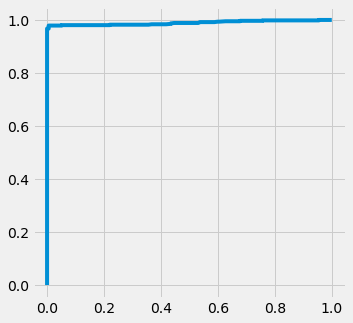

In [20]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)

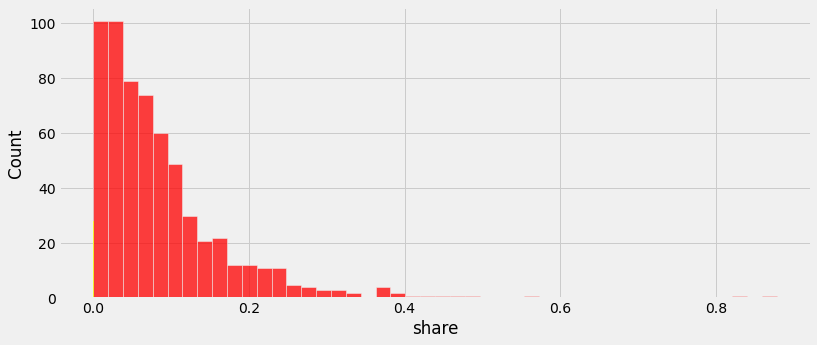

In [21]:
sns.histplot(df_train.share[y_train ==1],color = 'red')
sns.histplot(df_train.share[y_train ==0],color = 'yellow')

In [22]:
numerical = ['reports','age','income','share','expenditure','dependents',	'months',	'majorcards',	'active',	'owner_n',	'selfemp_n']

In [23]:
for c in numerical:
  auc = roc_auc_score(y_train,df_train[c])
  print(c, auc)

reports 0.28333701393106236
age 0.4759979020592945
income 0.5908049467233478
share 0.989183643423692
expenditure 0.991042345276873
dependents 0.46722427722262094
months 0.470578221903237
majorcards 0.5343859842838476
active 0.6043173411362006
owner_n 0.5856751136384548
selfemp_n 0.49020040854634794


In [24]:
for c in numerical:
  auc = roc_auc_score(y_train,df_train[c])
  if auc < 0.5:
    auc = roc_auc_score(y_train,-df_train[c])
  print(c, auc)

reports 0.7166629860689376
age 0.5240020979407055
income 0.5908049467233478
share 0.989183643423692
expenditure 0.991042345276873
dependents 0.5327757227773791
months 0.5294217780967629
majorcards 0.5343859842838476
active 0.6043173411362006
owner_n 0.5856751136384548
selfemp_n 0.5097995914536521


## **Answer: Share**

# **Training the model**
_____

From now on, use these columns only:

In [25]:
features = ['reports','age','income',	'share','expenditure','dependents','months','majorcards',	'active',	'owner_n',	'selfemp_n']

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

In [26]:
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

LogisticRegression(max_iter=1000, solver='liblinear')

# **Question 2**
----

What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.615
* 0.515
* 0.715
* 0.995


In [27]:
train_dict = df_train[features].to_dict(orient='records')
train_dict[:10]

[{'reports': 3,
  'age': 40.5,
  'income': 4.0128,
  'share': 0.0002990431,
  'expenditure': 0.0,
  'dependents': 1,
  'months': 12,
  'majorcards': 1,
  'active': 17,
  'owner_n': 0,
  'selfemp_n': 0},
 {'reports': 1,
  'age': 32.33333,
  'income': 6.0,
  'share': 0.0002,
  'expenditure': 0.0,
  'dependents': 4,
  'months': 18,
  'majorcards': 1,
  'active': 4,
  'owner_n': 1,
  'selfemp_n': 0},
 {'reports': 1,
  'age': 29.16667,
  'income': 2.2,
  'share': 0.03820546,
  'expenditure': 69.79333000000001,
  'dependents': 0,
  'months': 49,
  'majorcards': 1,
  'active': 7,
  'owner_n': 0,
  'selfemp_n': 0},
 {'reports': 1,
  'age': 54.66667,
  'income': 7.29,
  'share': 0.1065361,
  'expenditure': 647.2067,
  'dependents': 2,
  'months': 78,
  'majorcards': 1,
  'active': 9,
  'owner_n': 1,
  'selfemp_n': 0},
 {'reports': 0,
  'age': 25.0,
  'income': 3.3984,
  'share': 0.0003531073,
  'expenditure': 0.0,
  'dependents': 2,
  'months': 29,
  'majorcards': 0,
  'active': 4,
  'owner_n':

In [28]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [29]:
model = LogisticRegression(solver='liblinear',C=10, max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [30]:
val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]

In [31]:
roc_auc_score(y_val,y_pred)

0.9955289278368953

## **Answer: 0.995**

# **Question 3**

Now let's compute precision and recall for our model.

  * Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
  * For each threshold, compute precision and recall
  * Plot them

At which threshold do precision and recall curves intersect?

* 0.1
* 0.3
* 0.6
* 0.8


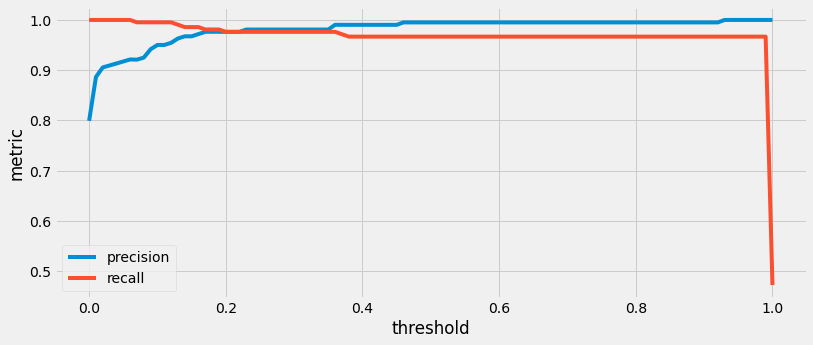

In [32]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)

  predict_positive = (y_pred >= t)
  predict_negative = (y_pred <= t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  p = tp / (tp + fp)
  r = tp / (tp + fn)

  scores.append((t, p, r))

columns = ['threshold','precision','recall']
df_scores = pd.DataFrame(scores, columns=columns)
  
plt.plot(df_scores.threshold,df_scores.precision, label ='precision')
plt.plot(df_scores.threshold,df_scores.recall,label = 'recall')
plt.xlabel('threshold')
plt.ylabel('metric')
plt.legend()

In [33]:
df_scores[::10]

,threshold,precision,recall
0,0.0,0.799242,1.000000
10,0.1,0.950226,0.995261
20,0.2,0.976303,0.976303
30,0.3,0.980952,0.976303
40,0.4,0.990291,0.966825
50,0.5,0.995122,0.966825
60,0.6,0.995122,0.966825
70,0.7,0.995122,0.966825
80,0.8,0.995122,0.966825
90,0.9,0.995122,0.966825


## **Answer: 0.3**

# **Question 4**
----
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

* 0.1
* 0.4
* 0.6
* 0.7


In [34]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)

  predict_positive = (y_pred >= t)
  predict_negative = (y_pred <= t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  p = tp / (tp + fp)
  r = tp / (tp + fn)
  f1_score = 2 * (( p * r) / (p + r))

  scores.append((t, p, r, f1_score))

columns = ['threshold','precision','recall','f1_score']
df_scores = pd.DataFrame(scores, columns=columns)
  
max_f1_score = df_scores['f1_score'].max()
print(max_f1_score)
df_scores[df_scores['f1_score'] == max_f1_score].threshold

0.9832935560859187


36    0.36
Name: threshold, dtype: float64

## **Answer: 0.4**

# **Question 5**
----
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:



In [ ]:
KFold(n_splits=5, shuffle=True, random_state=1)

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on the validation

How large is the standard deviation of the AUC scores across different folds?

* 0.003
* 0.014
* 0.09
* 0.24

In [35]:
columns = ['reports','age','income',	'share','expenditure','dependents','months','majorcards',	'active',	'owner_n',	'selfemp_n']

In [36]:
def train(df_train, y_train, C=1.0):
  dicts = df_train[columns].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(solver ='liblinear', C=C, max_iter=1000)
  model.fit(X_train, y_train)

  return dv, model

In [37]:
def predict(df, dv, model):
  dicts = df[columns].to_dict(orient='records')

  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:,1]

  return y_pred

In [38]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]

  y_train = df_train.card_n.values
  y_val = df_val.card_n.values

  dv, model = train(df_train, y_train, C = 1)
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores.append(auc)


In [39]:
std = np.array(scores).std()
std

0.0028356506168456257

## **Answer: 0.003**

# **Question 6**

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: [0.01, 0.1, 1, 10]
* Initialize KFold with the same parameters as previously
* Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

* 0.01
* 0.1
* 1
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [40]:
def train(df_train, y_train, C=1.0):
  dicts = df_train[columns].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(solver ='liblinear', C=C, max_iter=1000)
  model.fit(X_train, y_train)

  return dv, model

In [41]:
def predict(df, dv, model):
  dicts = df[columns].to_dict(orient='records')

  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:,1]

  return y_pred

In [42]:
n_splits = 5

for C in [0.01, 0.1, 1, 10]:
  kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 1)
  
  scores = []
  
  for train_idx, val_idx in kfold.split(df_full_train): # the k-fold split uses indx to shuffle the data
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card_n.values # y values comes from dataset
    y_val = df_val.card_n.values

    dv, model = train(df_train, y_train, C = 1) #training and predicting
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred) # AUC
    scores.append(auc)

print ('C= %s %.3f +- %.3f' % (C,np.mean(scores),np.std(scores)))


C= 10 0.996 +- 0.003


## **Answer: 10**